<a href="https://colab.research.google.com/github/Roberto014/Anal-tica-de-datos-y-herramientas-de-inteligencia-artificial-II/blob/main/Act%203.5%20Regresi%C3%B3n%20Lineal%20Simple%20y%20M%C3%BAltiple/Act_3_5_Regresi%C3%B3n_Lineal_Simple_y_M%C3%BAltiple__Filtro4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Datos_limpios (4).csv")

In [ ]:
df.head(5)

,Unnamed: 0,last_scraped,source,name,host_name,host_since,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,Marco,2013-01-21,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1652.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,0.41
1,1,2024-06-27,city scrape,Villa Dante,Dici,2010-06-28,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,...,1.0,3663.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
2,2,2024-06-28,city scrape,CONDESA HAUS B&B,Fernando,2010-08-09,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,...,1.9,1477.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.42
3,3,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,Martina,2013-01-09,"['email', 'phone']",t,t,Miguel Hidalgo,...,3.0,814.0,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1.19
4,4,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",Nicholas,2011-01-04,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1923.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.32


In [ ]:
filtro4 = df[df["room_type"] == "Hotel room"]
filtro4

,Unnamed: 0,last_scraped,source,name,host_name,host_since,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
38,38,2024-06-28,previous scrape,COOL PENT HOUSE APARTMENT @CONDESA,Fernando,2010-08-09,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,...,1.9,1477.0,4.71,4.71,5.00,5.00,5.00,5.00,4.86,0.06
86,86,2024-06-28,city scrape,MODERN/HIP FURNISHED APARTMENT ( S1 Condesa Haus),Fernando,2010-08-09,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,...,1.0,2808.0,4.00,5.00,5.00,5.00,4.80,5.00,4.00,0.02
90,90,2024-06-28,previous scrape,Descansa en la Suite de la Abuelita San Angel ...,Martha Laura,2012-06-01,"['email', 'phone', 'work_email']",t,t,Álvaro Obregón,...,1.9,1477.0,4.96,5.00,5.00,5.00,4.96,4.93,4.93,0.22
103,103,2024-06-28,previous scrape,"Cómodo Estudio del Botánico, San Angel CDMX",Martha Laura,2012-06-01,"['email', 'phone', 'work_email']",t,t,Álvaro Obregón,...,1.9,1477.0,4.88,4.84,4.96,4.91,4.93,4.96,4.88,0.45
124,124,2024-06-28,previous scrape,Business Suite BEIGE near Reforma,Hermann,2012-10-12,"['email', 'phone']",t,t,Cuauhtémoc,...,1.9,1477.0,4.84,4.88,4.84,5.00,5.00,4.84,4.80,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,24761,2024-06-28,city scrape,Wander Zócalo! 3 Rooms w/ Spa in Amazing Hotel,Andaz Mexico City,2023-11-15,"['email', 'phone']",t,t,Cuauhtémoc,...,6.0,1477.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
24771,24771,2024-06-28,city scrape,4 Family Rooms w/ Heated Pool - Popocatepetl V...,Andaz Mexico City,2023-11-15,"['email', 'phone']",t,t,Cuauhtémoc,...,1.9,1477.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
24775,24775,2024-06-28,city scrape,Opulent Hotel Perfect for Couples!,Andaz Mexico City,2023-11-15,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,5019.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
24776,24776,2024-06-28,city scrape,Artistic Boutique Hotel w/ Rooftop Infinity Pool,Andaz Mexico City,2023-11-15,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,5294.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70


In [ ]:
Vars_indep = filtro4[['host_response_rate']]
Vars_dep = filtro4['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.1294539]),
 'rank_': 1,
 'singular_': array([97.54906458]),
 'intercept_': 107.12536608665926}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro4[['host_response_rate']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 97.02796197,
       94.438884  , 97.02796197, 97.02796197, 94.1799762 , 94.1799762 ,
       94.91786342, 96.76905418, 97.02796197, 94.91786342, 94.91786342,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.91786342, 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.91786342, 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.1799762 , 94.91786342, 94.91786342, 94.1799762 ,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.91786342,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 ,
       94.1799762 , 94.1799762 , 94.1799762 , 94.1799762 , 94.17

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro4.insert(0, 'predicciones', y_pred)

#

<Axes: xlabel='host_response_rate', ylabel='predicciones'>

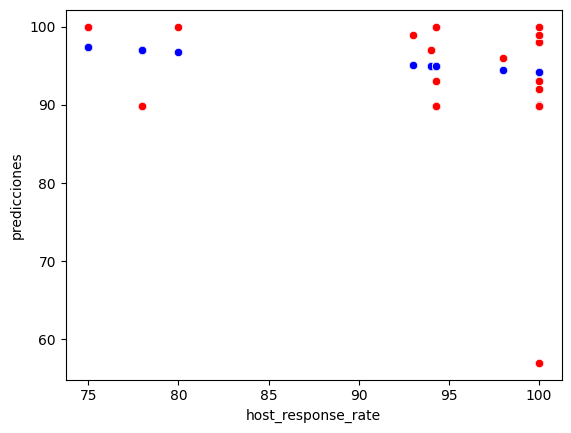

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='host_response_rate', y='predicciones', color="blue", data=filtro4)
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=filtro4)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.019180749681626197

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.13849458358226938

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro4[['price']]
Vars_dep = filtro4['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00030366]),
 'rank_': 1,
 'singular_': array([24942.69067611]),
 'intercept_': 95.68449552586281}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro4[['price']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([95.23599679, 94.83183171, 95.23599679, 95.23599679, 95.23599679,
       95.23599679, 95.23599679, 95.29520955, 95.35077846, 92.76424342,
       95.33347011, 92.60543174, 93.06243283, 93.82126719, 95.55483475,
       95.07748877, 95.45705778, 95.23599679, 95.23599679, 95.23599679,
       95.08022167, 95.08022167, 95.23599679, 95.08022167, 95.23599679,
       95.4175826 , 95.07748877, 95.17587306, 95.58034179, 95.46282723,
       95.49319275, 95.47193688, 95.46282723, 95.49319275, 95.5023024 ,
       95.23599679, 95.51748516, 95.50837551, 95.23599679, 95.5023024 ,
       95.51748516, 95.53266792, 93.91023816, 95.32314583, 95.23599679,
       95.07900705, 95.23599679, 93.45961384, 95.41727895, 95.44460791,
       95.41424239, 95.36565756, 95.35077846, 95.23599679, 95.23599679,
       95.23599679, 95.23599679, 95.23599679, 95.23599679, 95.23599679,
       95.38387687, 95.23599679, 95.23599679, 95.23599679, 95.23599679,
       95.23599679, 95.23599679, 95.23599679, 95.27395369, 95.57

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro4.insert(0, 'predicciones_1', y_pred)


<Axes: xlabel='price', ylabel='predicciones_1'>

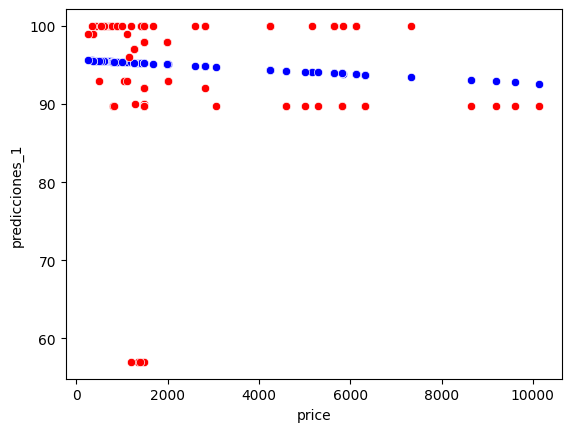

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='price', y='predicciones_1', color="blue", data=filtro4)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro4)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.006899810313752974

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.08306509684430022

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro4[['number_of_reviews']]
Vars_dep = filtro4['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.04697123]),
 'rank_': 1,
 'singular_': array([338.86580351]),
 'intercept_': 94.25579099658624}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro4[['number_of_reviews']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([ 94.58458963,  94.30276223,  95.57098551,  96.93315126,
        95.43007182,  95.71189921,  96.8392088 ,  96.04069784,
        94.44367593,  94.53761839,  96.18161154,  94.255791  ,
        94.34973346,  97.21497866, 100.78479235,  95.38310058,
        95.75887044,  94.255791  ,  94.77247456,  94.30276223,
        94.91338826,  94.77247456,  94.91338826,  94.91338826,
        95.05430195,  97.26194989,  94.44367593, 103.50912385,
       102.61667043,  94.53761839,  94.34973346,  94.67853209,
        94.58458963,  94.58458963,  94.49064716,  94.39670469,
        94.72550332,  94.30276223,  94.34973346,  94.44367593,
        95.24218688,  96.275554  ,  94.67853209,  94.30276223,
        95.61795675,  94.44367593,  94.255791  ,  94.255791  ,
        94.34973346,  94.63156086,  94.34973346,  95.10127319,
        94.30276223,  94.255791  ,  96.13464031,  94.30276223,
        94.255791  ,  94.39670469,  94.30276223,  94.255791  ,
        94.30276223,  94.255791  ,  95.19521565,  95.14

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro4.insert(0, 'predicciones_2', y_pred)


<Axes: xlabel='number_of_reviews', ylabel='predicciones_2'>

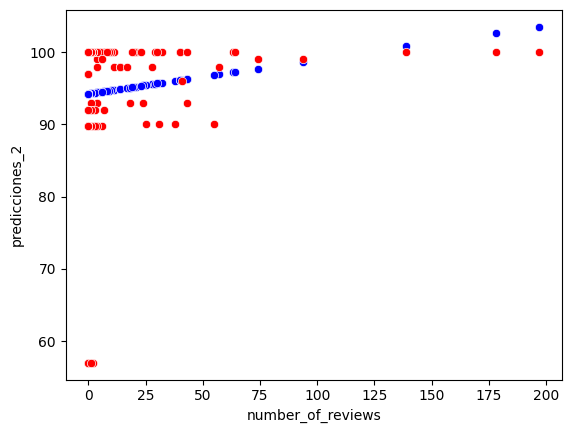

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='number_of_reviews', y='predicciones_2', color="blue", data=filtro4)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=filtro4)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.030472528694018064

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.17456382412750376

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro4[['review_scores_cleanliness']]
Vars_dep = filtro4['review_scores_location']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.56165032]),
 'rank_': 1,
 'singular_': array([1.95242262]),
 'intercept_': 2.145555938781021}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro4[['review_scores_cleanliness']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([4.95380755, 4.95380755, 4.95380755, 4.93134153, 4.8639435 ,
       4.92010853, 4.88079301, 4.93695804, 4.95380755, 4.57750183,
       4.91449203, 4.84147748, 4.95380755, 4.88079301, 4.89764252,
       4.79092895, 4.76284644, 4.84147748, 4.90325902, 4.95380755,
       4.83586098, 4.90325902, 4.95380755, 4.71229791, 4.75722993,
       4.84709399, 4.84147748, 4.90887552, 4.89202601, 4.67298239,
       4.67298239, 4.63928337, 4.71229791, 4.63366686, 4.50448729,
       4.84147748, 4.78531245, 4.95380755, 4.95380755, 4.95380755,
       4.66174938, 4.67859889, 4.95380755, 4.95380755, 4.95380755,
       4.95380755, 4.84147748, 4.84147748, 4.95380755, 4.95380755,
       4.95380755, 4.79654546, 4.95380755, 4.84147748, 4.95380755,
       4.95380755, 4.84147748, 4.95380755, 4.95380755, 4.84147748,
       4.95380755, 4.84147748, 4.95380755, 4.92572503, 4.91449203,
       4.95380755, 4.89764252, 4.84147748, 4.84147748, 4.78531245,
       4.84147748, 4.95380755, 4.95380755, 4.95380755, 4.95380

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro4.insert(0, 'predicciones_3', y_pred)

#

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

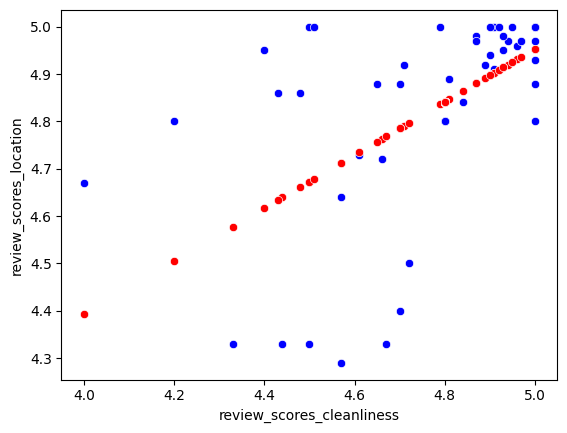

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro4)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_3', color="red", data=filtro4)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.4029757933406707

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.6348037439560913

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro4[['number_of_reviews']]
Vars_dep = filtro4['availability_365']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.33180758]),
 'rank_': 1,
 'singular_': array([338.86580351]),
 'intercept_': 252.29977392102825}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro4[['number_of_reviews']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([254.62242699, 252.6315815 , 261.59038619, 271.21280604,
       260.59496345, 262.58580893, 270.54919088, 264.908462  ,
       253.62700425, 254.29061941, 265.90388474, 252.29977392,
       252.96338908, 273.20365153, 298.42102769, 260.26315587,
       262.91761651, 252.29977392, 255.94965731, 252.6315815 ,
       256.94508006, 255.94965731, 256.94508006, 256.94508006,
       257.9405028 , 273.53545911, 253.62700425, 317.66586739,
       311.36152335, 254.29061941, 252.96338908, 255.28604215,
       254.62242699, 254.62242699, 253.95881183, 253.29519666,
       255.61784973, 252.6315815 , 252.96338908, 253.62700425,
       259.26773312, 266.56749991, 255.28604215, 252.6315815 ,
       261.92219377, 253.62700425, 252.29977392, 252.29977392,
       252.96338908, 254.95423457, 252.96338908, 258.27231038,
       252.6315815 , 252.29977392, 265.57207716, 252.6315815 ,
       252.29977392, 253.29519666, 252.6315815 , 252.29977392,
       252.6315815 , 252.29977392, 258.93592554, 258.60

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro4.insert(0, 'predicciones_5', y_pred)

#

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

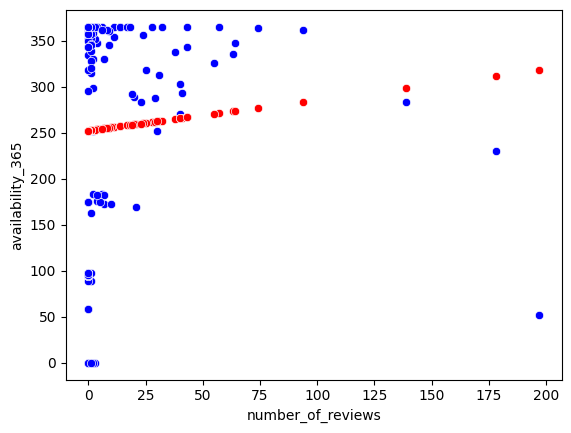

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro4)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color="red", data=filtro4)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.0073645418479068026

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.08581690886944601

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro4[['review_scores_communication']]
Vars_dep = filtro4['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.5926204]),
 'rank_': 1,
 'singular_': array([1.91630386]),
 'intercept_': 3.732824214767993}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro4[['review_scores_communication']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([0.7697222 , 0.88824628, 0.79342702, 0.81120563, 0.7697222 ,
       0.7697222 , 0.78157461, 0.7697222 , 0.7697222 , 1.16677787,
       0.90009869, 0.88824628, 0.7697222 , 0.85268906, 0.80527943,
       0.96528693, 0.95343453, 0.88824628, 0.7697222 , 0.7697222 ,
       0.94158212, 0.98306555, 0.7697222 , 1.10751583, 0.80527943,
       0.80527943, 0.88824628, 0.82305804, 0.84083665, 1.26159714,
       0.7697222 , 1.16677787, 1.19048269, 0.7697222 , 1.24381852,
       0.88824628, 1.00677036, 0.7697222 , 0.88824628, 0.7697222 ,
       0.9119511 , 1.04825379, 0.7697222 , 0.7697222 , 0.7697222 ,
       0.7697222 , 0.88824628, 0.88824628, 0.7697222 , 0.9178773 ,
       0.7697222 , 0.93565591, 0.7697222 , 0.88824628, 0.79935322,
       0.7697222 , 0.88824628, 0.7697222 , 0.7697222 , 0.88824628,
       0.7697222 , 0.88824628, 0.7697222 , 0.86454147, 0.81120563,
       0.7697222 , 0.78750081, 0.88824628, 0.88824628, 0.81120563,
       0.88824628, 0.7697222 , 0.7697222 , 0.7697222 , 0.76972

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro4.insert(0, 'predicciones_6', y_pred)

#

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

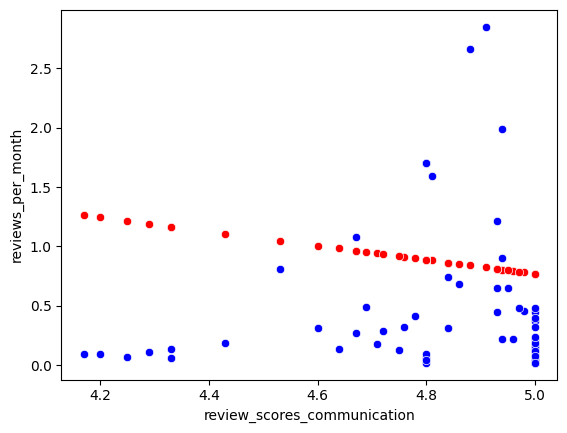

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro4)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color="red", data=filtro4)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.01727750076104606

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.1314439072800488